Shape of training data  is:  (4, 2106, 2816)
Shape of label is:  (2106, 2816)
The number of image chips is:  5808
**** number of sample pixels for each class ****


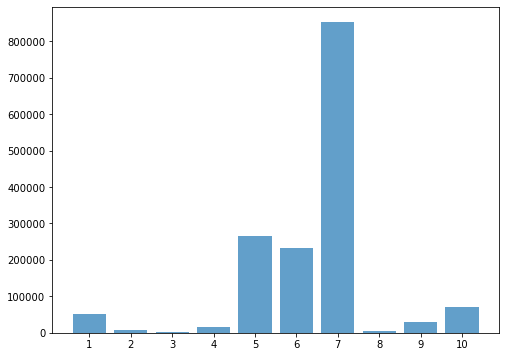

In [8]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import rasterio as rs 
os.chdir("D:/...../UNET")

def trainchips(img, label, stride, winsize):
    image= rs.open(img)
    inv= rs.open(label)
    imgarr=image.read()
    invarr= inv.read(1)
    print("Shape of training data  is: ",imgarr.shape) 
    print("Shape of label is: ",invarr.shape)
    index=0
    os.mkdir("D:/....../UNET/S2")
    os.chdir("D:/....../UNET/S2")
    for i in np.arange(0,imgarr.shape[1],stride):
        for j in np.arange(0,imgarr.shape[2],stride):
            img=imgarr[:,i:i+winsize,j:j+winsize]
            lbl= invarr[i:i+winsize,j:j+winsize]
            x,y = (j*image.transform[0]+image.transform[2]),(image.transform[5]+i*image.transform[4])
            transform= [image.transform[0],0,x,0,image.transform[4],y]
            index+=1
            with rs.open(str(index)+"_img.tif","w",driver='GTiff', count=imgarr.shape[0], dtype=imgarr.dtype,
                         width=winsize, height=winsize, transform=transform, crs=image.crs) as raschip:
                         raschip.write(img)
            with rs.open(str(index)+"_lbl.tif","w",driver='GTiff', count=1, dtype=invarr.dtype,
                         width=winsize, height=winsize, transform=transform, crs=image.crs) as lblchip:
                         lblchip.write(lbl,1)
                
    print("The number of image chips is: ", index)
    i,j = np.unique(invarr[invarr>0], return_counts= True)
    plt.figure(figsize=(8,6))
    print("**** number of sample pixels for each class ****")
    plt.bar(i, j,alpha=0.7, tick_label=i)
    

imgchips= trainchips("image.tif", "label.tif", 32, 64)